## <center>Dimension Reduction Using Principal Component Analysis in Machine Learning

This project aims to leverage the power of Principal Component Analysis (PCA) to address the pressing need for efficient dimensionality reduction in the era of data overload. With an increasing influx of high-dimensional data, extracting valuable insights and patterns becomes paramount.

PCA is a robust mathematical technique frequently employed in data analysis and machine learning. Its primary objective is to distill meaningful insights from complex datasets characterized by numerous variables. By identifying and preserving the most influential dimensions while discarding less informative ones, PCA allows for a more concise representation of the data.

In this project, our specific focus is on utilizing PCA to streamline the analysis of fish species data. By reducing the dimensionality of the dataset, we aim to enhance the efficiency and accuracy of predictive modeling. Our goal is to create a Random forest classification model capable of accurately classifying fish species based on their weight and various measurements.

By undertaking this project, we aim to not only gain a deeper understanding of PCA but also demonstrate its practical utility in solving real-world problems. Ultimately, this research will contribute to the broader goal of enhancing the quality and efficiency of data analysis in diverse fields. 



In [52]:
# Importing Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
# Loading Data into a DataFrame
df=pd.read_csv("Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


<Axes: >

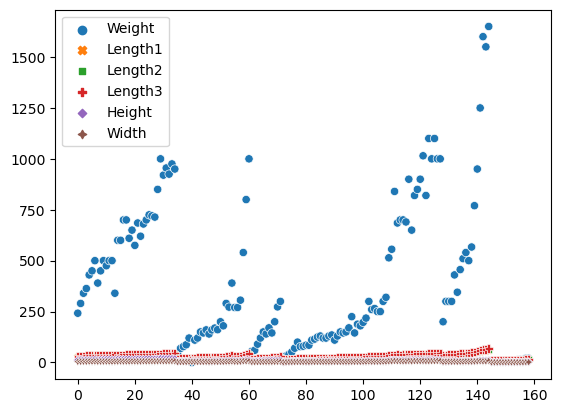

In [54]:
# Visualizing correlation in our dataset before scaling 
sns.scatterplot(df)

In [55]:
# Scaling our data 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[df.columns[1:]]=scaler.fit_transform(df[df.columns[1:]])
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,Bream,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,Bream,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,Bream,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,Bream,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371


<Axes: >

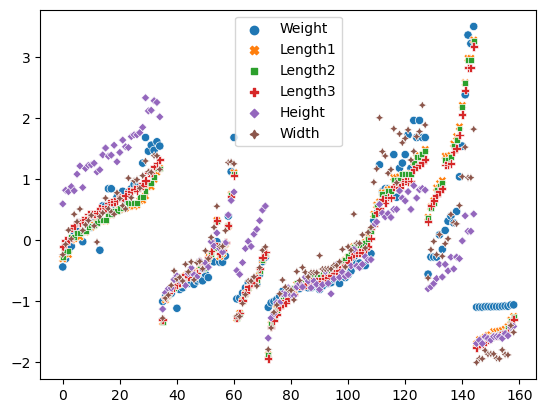

In [56]:
# Visualizing correlation after scaling features 
sns.scatterplot(df)

In [57]:
# Defining x and y variables 

x=df[df.columns[1:]]
y=df[df.columns[0]]

In [58]:
# Reducing dimensions with Principal Component Analysis

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x=pca.fit_transform(x)

In [59]:
# Splitting data into train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.6)

In [60]:
# Under sampling to fix class imbalance
import imblearn
from imblearn.under_sampling import RandomUnderSampler
usampler=RandomUnderSampler(replacement=True)
x_train,y_train=usampler.fit_resample(x_train,y_train)

In [61]:
# fitting model to the data
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier()
rmodel.fit(x_train,y_train)

# Obtaining Predictions 
pred=rmodel.predict(x_test)

In [62]:
# Evaluating the models performance 
from sklearn.metrics import classification_report
report=classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        12
      Parkki       0.80      1.00      0.89         4
       Perch       0.93      0.56      0.70        25
        Pike       1.00      1.00      1.00         5
       Roach       0.46      0.75      0.57         8
       Smelt       1.00      1.00      1.00         9
   Whitefish       0.00      0.00      0.00         1

    accuracy                           0.78        64
   macro avg       0.74      0.76      0.74        64
weighted avg       0.88      0.78      0.81        64

